# CIFAR10 Sınıflandırma Problemi

🎯 **Egzersiz Hedefleri**

* 1️⃣ **`10-sınıf sınıflandırma problemini`** çözmek için bir CNN uygulama

* 2️⃣ **`Veri Artırma Teknikleri`** ile CNN'in performansını artırma

* 3️⃣ **`Google Colab kullanarak Görüntü İşlemeyi Hızlandırmak için GPU'lar`** ile deneme yapma

<hr>


👏 Artık şunları daha iyi anlamalısınız:
* CNN'lerin nasıl çalıştığını,
* ve özellikle konvolüsyonların belirli uzamsal özellikleri tespit etmek için görüntüleri nasıl taradığını.

🚀 El yazısı rakamlardan veya üçgen/dairelerden biraz daha karmaşık görüntülerle oynama zamanı.

🎨 [Wikipedia](https://en.wikipedia.org/wiki/CIFAR-10)'dan (*daha fazla bilgi için linke tıklayın*):

> **`CIFAR-10`** veri kümesi (Canadian Institute For Advanced Research) makine öğrenimi ve bilgisayar görme algoritmalarını eğitmek için yaygın olarak kullanılan bir görüntü koleksiyonudur. Makine öğrenimi araştırmaları için en yaygın kullanılan veri kümelerinden biridir. CIFAR-10 veri kümesi 10 farklı sınıfta 60.000 adet 32x32 renkli görüntü içerir. Bu 10 farklı sınıf uçaklar, arabalar, kuşlar, kediler, geyikler, köpekler, kurbağalar, atlar, gemiler ve kamyonları temsil eder. Her sınıftan 6.000 görüntü vardır.

<img src="https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/mini-projets/cifar10_notebook_fichiers/cifar_10.png">

⭐️ Bu veri kümesi araştırma topluluğunda ikonik bir konuma sahiptir çünkü görüntü tanıma için birçok geliştirme bu veri kümesi üzerinde gerçekleştirilmiştir. Bu veri kümesi üzerinde harika performans elde ettikten sonra, araştırmacılar daha gelişmiş CIFAR-100'e geçmişlerdir.

[University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html)'dan:

> Bu veri kümesi CIFAR-10 gibidir, ancak her biri 600 görüntü içeren 100 sınıfa sahiptir. Her sınıf için 500 eğitim görüntüsü ve 100 test görüntüsü vardır. CIFAR-100'deki 100 sınıf 20 üst sınıf halinde gruplandırılmıştır. Her görüntü bir "ince" etiket (ait olduğu sınıf) ve bir "kaba" etiket (ait olduğu üst sınıf) ile gelir.


🔥 Bu notebook'ta, ***CIFAR-10 veri kümesinden 10 kategoriyi ayırt etmek için bir CNN uygulayalım***.

❗️ Tekrar hatırlatmak gerekirse, 10 yıl öncesine kadar bu problem tüm araştırma topluluğu için çok zordu. CNN becerilerinizi keskinleştirdiğinize göre, parlamanın zamanı geldi!

## 🛠 Google Colab Kurulumu

Google Colab kullanmayı planlıyorsanız (bu challenge için şiddetle önerilir), her şeyi düzgün çalıştırabilmek için önce dikkat etmeniz gereken birkaç şey vardır.

* Başlamak istiyorsanız, bu dört adımı takip edin.
* Ayrıca bu dosyayı da okuyabilirsiniz 👉 [Google Colab'a Giriş](https://docs.google.com/document/d/1oU4pQbNxCfu5Rm1ANfIqgylZfExsTVrnMLdKZz4toig/edit?usp=sharing)

### Adım 1: Challenge Klasörünü Google Drive'a Yükleyin ve Colab'da Açın

Google Colab'ın bu notebook'u çalıştırabilmesi için ***tüm gerekli dosyaları Google Drive'ınıza yüklemeniz*** gerekir.

Bunu yapmak için basitçe:
1. [Google Drive](https://drive.google.com/)'ınıza erişin
2. `Colab Notebooks klasörüne` gidin
3. Bu `challenge klasörünü` oraya sürükleyip bırakın
4. Notebook dosyasına sağ tıklayın ve `Birlikte aç` $\rightarrow$ `Google Colaboratory` seçin

### Adım 2: Google Drive'ı Bağlayın

Önceki adım gerekliydi ama yeterli değil. Güvenlik amacıyla, Google Colab ve Google Drive aynı Google Hesabına ait olsalar bile bağlı DEĞİLLER

***Colab için kullanılan hesapla ilişkili Google Drive'ın ana dizinini bağlamamız*** gerekir.

*Not: kimlik doğrulama yaparken hata alıyorsanız, Google Chrome'da yapmayı deneyin, diğer tarayıcılarda sorun yaşanma eğilimi vardır.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


⬅️ Sol kenar çubuğunda bir 🗂 klasör simgesi vardır.
* Ona tıklarsanız, artık `drive/MyDrive` adlı bir klasör görmelisiniz. Bu sizin Google Drive'ınız ve tüm içeriğidir!

### Adım 3: Challenge Dizinine Gidin

Bir şey daha: bu notebook'u challenge klasörünün bağlamında kullanmamız gerekiyor.

Başka bir şey yapmanıza gerek yok, aşağıdaki hücreyi çalıştırın.

In [10]:
import os


# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks')

### Adım 4: GPU Hızlandırmayı Açın

Son adım olarak, notebook'umuz için GPU hızlandırmayı etkinleştirerek Google Colab'dan faydalanmalıyız.

Bunu menü çubuğundan şu şekilde yapabilirsiniz:

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator`

ve açılır menüden "GPU"yu seçin.

🚀 Artık başlamaya hazırsınız, challenge'a devam edin! 🚀

## (1) CIFAR10 Veri Kümesini Yükleme

❓ **Soru: CIFAR10 Veri Kümesini Yükleme** ❓


* 🎁 `Veri yükleme ve ön işleme` ile ilgilendik sizin için.
* ▶️ Sadece aşağıdaki hücreyi çalıştırın ve kodu anladığınızdan emin olun.

In [11]:
from keras.datasets import cifar10
import numpy as np

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


{np.uint8(0): np.int64(5000),
 np.uint8(1): np.int64(5000),
 np.uint8(2): np.int64(5000),
 np.uint8(3): np.int64(5000),
 np.uint8(4): np.int64(5000),
 np.uint8(5): np.int64(5000),
 np.uint8(6): np.int64(5000),
 np.uint8(7): np.int64(5000),
 np.uint8(8): np.int64(5000),
 np.uint8(9): np.int64(5000)}

### (1.1) Daha küçük bir veri kümesi üzerinde çalışma?

❓ **Eğitim boyutu hakkında soru** ❓

* $50.000$ görüntü üzerinde bir model eğitmek muhtemelen çok uzun sürecektir...
* 👨🏻‍🏫 **Büyütmeden önce hızlı iterasyon için her zaman bir alt örnekle başlayın**! 🆙
* Veri kümesi boyutunu `reduction_factor = 10` ile azalttığımız sonraki hücreyi çalıştırın. Biz söylemedikçe bunu artırmaya çalışmayın...

In [12]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{np.uint8(0): np.int64(503),
 np.uint8(1): np.int64(512),
 np.uint8(2): np.int64(466),
 np.uint8(3): np.int64(479),
 np.uint8(4): np.int64(518),
 np.uint8(5): np.int64(517),
 np.uint8(6): np.int64(530),
 np.uint8(7): np.int64(502),
 np.uint8(8): np.int64(476),
 np.uint8(9): np.int64(497)}

👇 Görüntülerle çalışıyorsunuz.. o yüzden bazılarına bakmak iyi bir fikir olacaktır :)

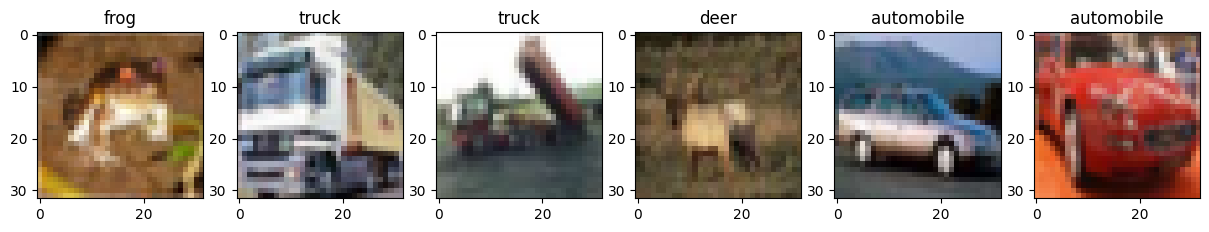

In [13]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

### (1.2) Görüntü ön işleme

👉 Her zamanki gibi, şunları yapalım:
- piksel yoğunluklarını 0 ve 1 arasında normalleştir
- `labels_train` ve `labels_test`i sırasıyla `y_train` ve `y_test` olarak adlandıracağımız "one-hot-encoded" hedeflere dönüştür

In [14]:
### Normalizing pixels' intensities
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## (2) Küçük eğitim setinizi kullanarak CNN mimariniz üzerinde iterasyon yapın




❓ **Soru** ❓ Parlama zamanı ⭐️⭐️⭐️ !

1. Seçtiğiniz CNN mimarisini bir `initialize_model()` fonksiyonunda tanımlayın:
2. Modelinizi bir `compile_model()` metodunda derleyin:
3. CNN'inizi sadece `küçük eğitim seti` üzerinde eğitin ve eğitim bilgilerini bir `history` değişkeninde kaydedin
---
* Kaybolmuş hissediyor musunuz?
* Performansınızı geliştirmek istiyor musunuz?

<details>
    <summary>🆘 PRO İPUÇLARI 🆘</summary>


- Görüntülerinizin **`input shape`**'ini ilk katmana eklemeyi unutmayın: 3 rengi var
- **`Basit başlayın, daha sonra karmaşıklaştırın`** daha iyi sonuçlar almak için birkaç denemeden sonra
- Görev karmaşık: **`En az 3 veya 4 konvolüsyon deneyin`**, görüntülerinizin **farklı konvolüsyonel katmanlardan farklı büyüteç camları / kerneller geçmesini istiyorsunuz!**
- Bu kadar küçük resim çözünürlüğü için Kernel Boyutu büyük olması gerekmez!
- Bazı **`MaxPooling2D`** ekleyin (ama çok fazla değil, aksi halde aktivasyon "görüntüsü" çok küçük olur)
- Başlamak için `padding = "same"` ve `stride = (1,1)` tutun.
- Modeliniz overfitting yapmaya başladığında, ağı düzenlemek için bazı **`Dropout Katmanları` eklemeyi deneyin**. İyi bir ipucu, **CNN'inizin overfitting yapmasını önlemek için tahmin katmanına yaklaştıkça Dropout Oranını/Gücünü artırmaktır**
- CIFAR10'daki görüntüler o kadar küçük ki, **GPU paralelleştirmesinden** daha da faydalanmak için daha büyük batch boyutu (32 veya 64) kullanmayı göze alabilirsiniz!
</details>

---

In [20]:
from keras import Sequential, Input, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense


def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    model.add(Conv2D(16, (3,3), activation = "relu", padding = "same"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = "relu", padding = "same"))
    model.add(MaxPooling2D((2,2)))

    model.add(Dropout(0.2))

    model.add(Conv2D(64, (2,2), activation = "relu", padding = "same"))

    model.add(Dropout(0.3))

    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())

    model.add(Dense(80, activation = "relu"))

    model.add(Dropout(0.4))

    model.add(Dense(10, activation = "softmax"))

    return model

model = initialize_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 80)             │        82,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,154 (375.60 KB)

 Trainable params: 96,154 (375.60 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from keras import optimizers
from keras.callbacks import EarlyStopping


def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
    return model

model_small = initialize_model()
model_small = compile_model(model)

es = EarlyStopping(patience = 5, verbose = 2)

history_small = model_small.fit(X_train_small, y_train_small, validation_split=0.3, callbacks = [es], epochs = 100, batch_size = 64)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.1103 - loss: 2.3003 - val_accuracy: 0.2353 - val_loss: 2.2151
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1870 - loss: 2.1595 - val_accuracy: 0.3233 - val_loss: 2.0410
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2887 - loss: 1.9660 - val_accuracy: 0.3373 - val_loss: 1.9520
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3135 - loss: 1.8845 - val_accuracy: 0.3513 - val_loss: 1.8300
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3578 - loss: 1.7943 - val_accuracy: 0.3967 - val_loss: 1.7554
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3541 - loss: 1.7533 - val_accuracy: 0.4040 - val_loss: 1.7213
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3676 - loss: 1.7137 - val_accuracy: 0.4173 - val_loss: 1.7064
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3713 - loss: 1.6852 - val_accuracy: 0.4280 

❓ **Soru: Eğitiminizin geçmişi** ❓

Aşağıdaki fonksiyonu önceki history üzerinde çalıştırın
_(varsayılan argümanları tutun, bunlar notebook'taki gelecekteki plotlar için tasarlandı)_

In [22]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

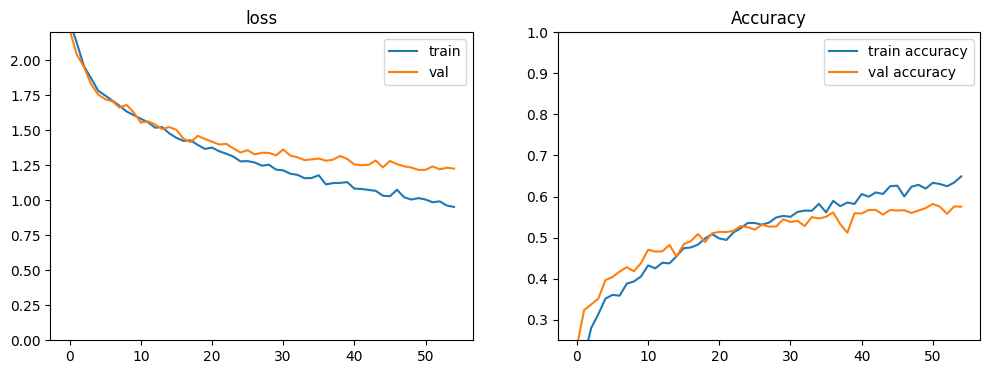

In [23]:
plot_history(history_small)
plt.show()

❓ **Soru: CNN'inizi Değerlendirme** ❓

* Modelinizi test verilerinde değerlendirin ve bir baseline doğruluk ile karşılaştırın.
* Bu performanstan memnun musunuz?
* Yukarıdaki `PRO İPUÇLARI`na bakın ve performansınızı geliştirmek istiyorsanız biraz iterasyon yapın!

In [24]:
res = model_small.evaluate(X_test_small, y_test_small, verbose = 0)

print(f'The accuracy is {res[1]*100:.1f}% compared to a chance level of {1./len(labels)*100}%')

The accuracy is 58.5% compared to a chance level of 10.0%


## (3) Eğitim verilerinizin boyutunu artırın

❓ **Soru: modelinizi tam veri seti üzerinde eğitin** ❓

- Daha önce yapmadıysanız **Colab**'a geçin
- `Runtime` $\rightarrow$ `Change runtime` $\rightarrow$ `GPU` tıklayarak **GPU hızlandırmasını** kullandığınızdan emin olun

💡 Görüntüler üzerinde sinir ağlarını eğitmek (her batch'te) paralelleştirilebilir ve bu **`paralelleştirme prosedürü`** **`GPU`** üzerinde yapılabilir.

---

Önemli performans iyileştirmesi gözlemlemelisiniz

Büyük verinin önemli bir fark yarattığı Deep Learning paradigmasına hoş geldiniz.

Ama sadece sınırlı miktarda resme erişebilirsem ne olur? Nadir türleri inceleyen biyologları düşünün. Ne yapabilirler?
* Çok fazla çalışma yapmadan bir modelin doğruluğunu iyileştirmek için **yeni veri üretebiliriz**.
* Bu sürece... ⭐️ **`Veri Artırma`** ⭐️ denir!
</details>

## (4) 🎁📚 Veri artırma

> ℹ️ Bu bölüm sorular ve cevapları da içerir. `Transfer Learning` challenge'ına geçmeden önce dikkatlice okuyun.

> 👨🏻‍🏫 Eğer `Transfer Learning` challenge'ı yapmaya zamanınız yoksa, endişelenmeyin, Recap oturumu sırasında bunun hakkında konuşabiliriz. Konvolüsyonel Sinir Ağları hakkındaki bu ünitenin oldukça yoğun olduğunu fark ediyoruz... ama aynı zamanda Deep Learning'in en heyecan verici uygulamalarından biri ❤️

* 👩🏻‍🏫 <b><u>Veri Artırma</u></b>
    * Bu teknik yaygın olarak kullanılır ve etiketlerini değiştirmeden giriş görüntülerine küçük dönüşümler uygulamaktan oluşur: ***yansıtma***, ***kırpma***, ***yoğunluk değişiklikleri***, vb...
    * _Geliştirilmiş performans_ basitçe CNN'in daha fazla görüntüyle (orijinal resimler + "artırılmış" olanlar) eğitilmesinden kaynaklanır.
    

* 👉 <b><u>Teorik olarak:</u></b>
    * (1) Orijinal resimlerin kopyalarına bazı dönüşümler uygulayarak bu yeni görüntüleri üretebiliriz
    * (2) Modeli orijinal görüntüler + yeni görüntüler üzerinde eğitiriz.
    
    
* 🚨  <b><u>Problem:</u></b>
    * Böyle bir prosedür tüm bu görüntülerin bellekte saklanmasını gerektirir...
    * Bu çok yoğun olabilir, o kadar ki bilgisayarınızın RAM'i hepsini barındıramayabilir
    
    
* 🦄 <b><u>Pratikte:</u></b>
    * Bir Sinir Ağı ileri/geri yayılım yaptığında, örneğin $ batch size = 16 $ seçtiyseniz aynı anda sadece 16 resim görmesi gerekir. Tüm orijinal görüntüleri veya artırılmış görüntüleri RAM'de saklaması gerekmez.
    * Bu nedenle, **veriyi anında (batch batch) artıracağız**. Bu ne demek? Her epoch ve her batch için, ***.fit()*** eğitim prosedürü sırasında, şunları yapacağız:
        1. Biraz `artırılmış veri/görüntü` üret
        2. Modeli görüntüler ve bunların artırılmış versiyonları üzerinde eğit
        3. Görüntüleri ve artırılmış versiyonlarını RAM'den sil
        4. 1-2-3 adımlarını tekrarla
        
* 📚 <a href= "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"><b><u>tf/keras/preprocessing/image/ImageDataGenerator</u></b></a>

❓ **Soru: bir ImageDataGenerator kullanma** ❓

Aşağıdaki koda bakın 👇
* Genel sözdizimi garip gelebilir ama endişelenmeyin:
    * İlk olarak, kullandığımız artırma tekniklerini tanımlayan *ImageDataGenerator* argümanlarına odaklanın
    * Sonra, 📚 <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">**`ImageDataGenerator`**</a> dokümantasyonunu daha sonra kontrol edin


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    )

datagen.fit(X_train)
datagen

In [26]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

❗️ Etiketleri kendiniz tanıyabilip tanıyamadığınızı kontrol etmek için **artırılmış görüntüleri her zaman görselleştirin** ❗️

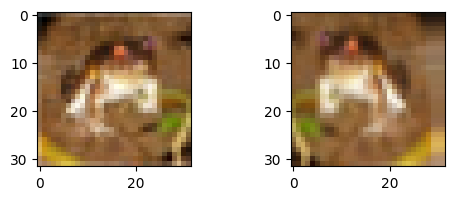

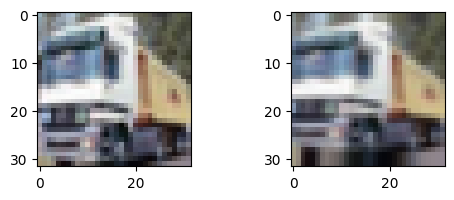

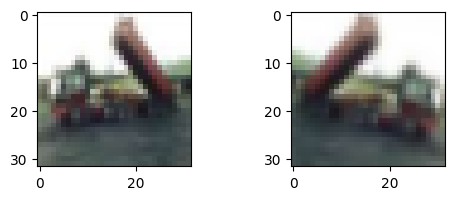

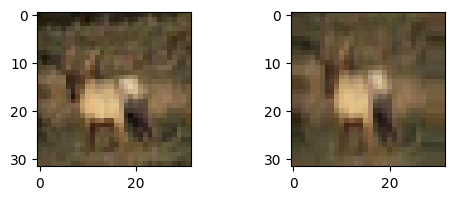

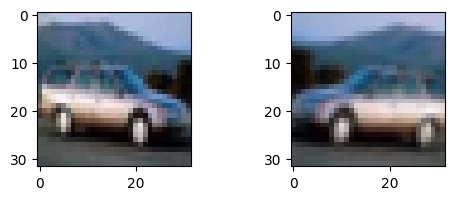

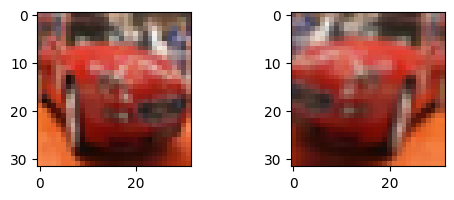

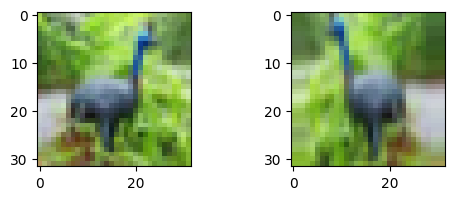

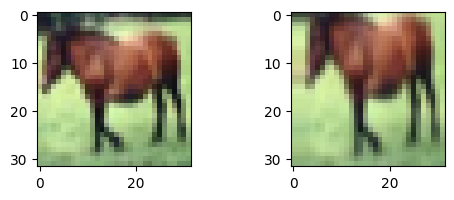

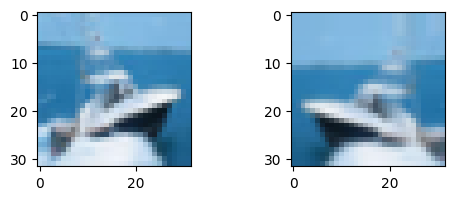

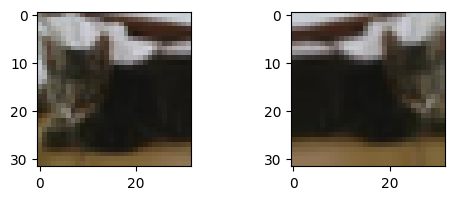

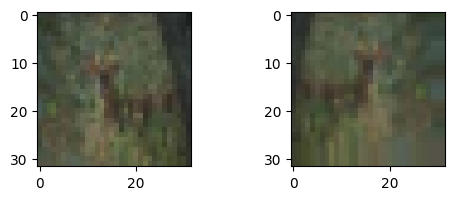

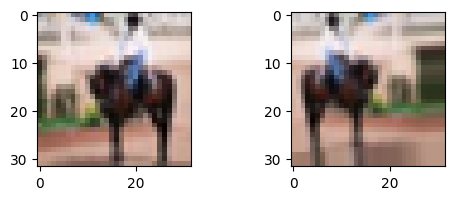

In [27]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()

    if i > 10:
        break

❗ **Notlar** ❗

* **`X_augmented_iterator`**'deki her görüntü, orijinal `X_train` görüntü veri setinde bulunan bir görüntünün ***artırılmış görüntüsüdür***
* Bu artırma süreci epoch başına bir kez yapılır.
* Bir epoch sırasında, model şunları yapacaktır:
    1. `X_train`'deki her resmin *artırılmış versiyonunu oluştur*,
    2. `X_train`'deki her görüntü için, *model rastgele olarak ya `X_train`'deki orijinal versiyonu ya da `X_augmented_iterator`'deki artırılmış versiyonunu seçer*
    3. ve model *bazı orijinal görüntüler + bazı artırılmış görüntülerin kombinasyonu* üzerinde eğitilir

---



❓ **Soru: artırılmış görüntülerimiz olduğunda validation seti nedir** ❓

* Daha önce, her epoch için modeli eğitirken modelin eğitim setini Tren/Validation ayrımına ayırmasını sağlamak için `validation_split` argümanını kullandık.
* **Eğitim setindeki bir görüntünü kullanmak ve onun dönüşümünü validation setinde kullanmak `veri sızıntısı`** olarak kabul edildiği için burada bu tür bir Tren/Val Ayrımı kullanmak mümkün değildir!.
* Bu nedenle, **`validation_data`**yı aşağıdaki komutlarla manuel olarak tanımlamamiz gerekir: aşağıdaki hücreyi anlamak için zaman ayırın:👇


In [32]:
from keras.callbacks import EarlyStopping

# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

# The early stopping criterion
es = EarlyStopping(patience = 3)

# The fit
history_aug = model_aug.fit(train_flow,
                        epochs = 20,
                        callbacks = [es],
                        validation_data = (X_val, y_val))


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.2254 - loss: 2.0673 - val_accuracy: 0.4234 - val_loss: 1.6338
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3866 - loss: 1.6756 - val_accuracy: 0.4773 - val_loss: 1.4934
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4298 - loss: 1.5740 - val_accuracy: 0.4920 - val_loss: 1.4270
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4570 - loss: 1.5113 - val_accuracy: 0.5231 - val_loss: 1.3583
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4677 - loss: 1.4699 - val_accuracy: 0.5358 - val_loss: 1.3105
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4749 - loss: 1.4484 - val_accuracy: 0.5685 - val_loss: 1.2412
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4897 - loss: 1.4200 - val_accuracy: 0.5638 - val_loss: 1.2287
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4967 - loss: 1.3907 - 

🚨 Eğitim burada oldukça uzun sürebilir...

👉 Bir sonraki egzersize geçip son soruları bitirmek için daha sonra bu notebook'a geri dönmekten çekinmeyin

❓ **Soru: Artırılmış veri seti olan model nasıl performans gösterdi?** ❓

Önceki ve mevcut çalıştırma geçmişlerini çizelim. Veri artırma hakkında ne düşünüyorsunuz?

The accuracy is 55.940% compared to a chance level of 10.0%


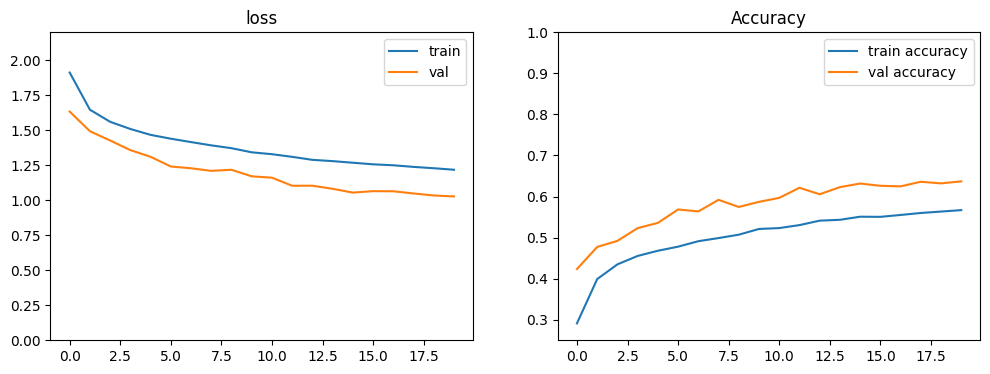

In [35]:
res = model.evaluate(X_test, y_test, verbose = 0)

print(f'The accuracy is {res[1]*100:.3f}% compared to a chance level of {1./len(labels)*100}%')
plot_history(history_aug);

🥡 <b><u>Veri Artırmadan Bazı Çıkarımlar:</u></b>

* Veri artırma performansınızı kolayca iyileştirmeyebilir...

* Burada hatta performansı düşürdü!

* Etkisi şunlara güçlü bir şekilde bağlıdır:
    * kullandığınız model mimarisi
    * öğrenme hızı,
    * seçilen artırma türü, vb...

* Görüntü sınıflandırması uzmanlaşmak için aylar ve yıllar pratiği gerektiren bir sanattır!

🚨 **Şu an modelinizi ince ayarlamaya çok fazla zaman harcamayın!  Araştırmanız gereken başka ilginç challenge'lar var!** 🚨

📚 [Burada gelecekte referans için iyi bir çözüm örneği var](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).<br>
Yaklaşık %80 doğruluk seviyesine ulaşmayı başardılar!

---

🏁 **Tebrikler** 🏁

1. Bu notebook'u `Google Drive`ınızdan veya doğrudan `Google Colab`'dan indirin
2. `Downloads` klasörünüzden yerel challenge klasörünüze sürükleyip bırakın  


💾 Kodunuzu push etmeyi unutmayın

3. Terminalınızda, challenge klasörü içinde her zamanki prosedürü takip edin:
      * *git add cifar_classification.ipynb*
      * *git commit -m "I am the god of CNNs"*
      * *git push origin master*

*İpucu*: Bu Colab notebook'unun nereye kaydedildiğini bulmak için, `File` $\rightarrow$ `Locate in Drive`'a tıklayın.

🚀 **Transfer Learning** challenge'ına geçme zamanı!